In [1]:
#Import necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset:

data= pd.read_csv(r"C:\Users\Kavita Iyer\Downloads\customer_segmentation.csv", parse_dates=['InvoiceDate'], encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
print("Total number of transactions happened in the given period: "+ str(data.shape[0]))

Total number of transactions happened in the given period: 531285


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531285 entries, 0 to 531284
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


In [5]:
#Dropping unnecessary coloumns:

data= data.drop(['StockCode','Description'], axis=1)
data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data['Total_Revenue']= data['Quantity'].multiply(data['UnitPrice'])
data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
#Detecting and dealing with missing values:

data.isnull().sum()

InvoiceNo             0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       133361
Country               0
Total_Revenue         0
dtype: int64

In [8]:
#Filling the missing value with dropna
data= data.dropna(subset=['CustomerID'],axis=0)

In [9]:
data.isnull().sum()

InvoiceNo        0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
Total_Revenue    0
dtype: int64

<AxesSubplot:xlabel='Quantity'>

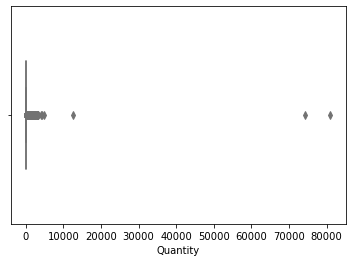

In [10]:
#Detecting and dealing with outliers in Quantity

sns.boxplot(data['Quantity'],color='plum',width=0.5)

<AxesSubplot:xlabel='UnitPrice'>

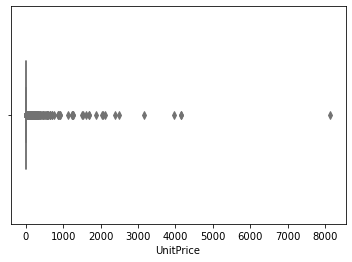

In [11]:
#Detecting and dealing with outliers in UnitPrice

sns.boxplot(data['UnitPrice'],color='plum',width=0.5)

<AxesSubplot:xlabel='Total_Revenue'>

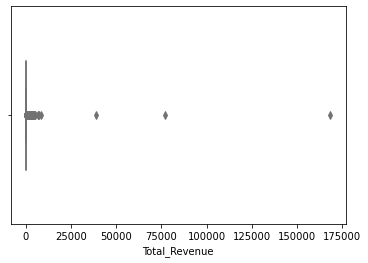

In [12]:
#Detecting and dealing with outliers in TotalRevenue

sns.boxplot(data['Total_Revenue'],color='plum',width=0.5)

In [13]:
#detecting outliers:
q1=data['Quantity'].quantile(0.25)
q2=data['Quantity'].quantile(0.50)
q3=data['Quantity'].quantile(0.75)
iqr=q3-q1
iqr


upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit


#replacing upper values with upper limit and lower values with lower limit
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

data['Quantity'] = data['Quantity'].apply(limit_imputer)

In [14]:
#detecting outliers:
q1=data['UnitPrice'].quantile(0.25)
q2=data['UnitPrice'].quantile(0.50)
q3=data['UnitPrice'].quantile(0.75)
iqr=q3-q1
iqr


upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit


#replacing upper values with upper limit and lower values with lower limit
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

data['UnitPrice'] = data['UnitPrice'].apply(limit_imputer)

In [15]:
#detecting outliers:
q1=data['Total_Revenue'].quantile(0.25)
q2=data['Total_Revenue'].quantile(0.50)
q3=data['Total_Revenue'].quantile(0.75)
iqr=q3-q1
iqr


upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit


#replacing upper values with upper limit and lower values with lower limit
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

data['Total_Revenue'] = data['Total_Revenue'].apply(limit_imputer)

<AxesSubplot:xlabel='Quantity'>

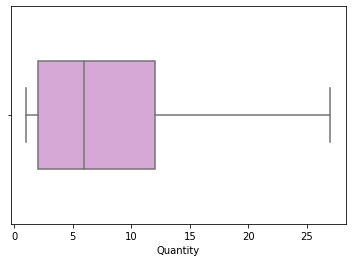

In [16]:
sns.boxplot(data['Quantity'],color='plum',width=0.5)

<AxesSubplot:xlabel='UnitPrice'>

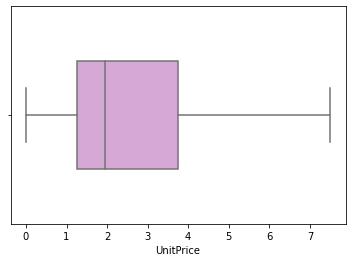

In [17]:
sns.boxplot(data['UnitPrice'],color='plum',width=0.5)

<AxesSubplot:xlabel='Total_Revenue'>

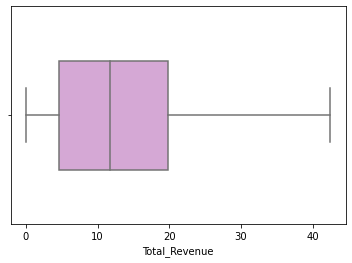

In [18]:
sns.boxplot(data['Total_Revenue'],color='plum',width=0.5)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 531284
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397924 non-null  object        
 1   Quantity       397924 non-null  float64       
 2   InvoiceDate    397924 non-null  datetime64[ns]
 3   UnitPrice      397924 non-null  float64       
 4   CustomerID     397924 non-null  float64       
 5   Country        397924 non-null  object        
 6   Total_Revenue  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 24.3+ MB


In [20]:
(data['Country'].value_counts()/len(data['Country']))*100

United Kingdom          89.048411
Germany                  2.272293
France                   2.096380
EIRE                     1.818940
Spain                    0.624491
Netherlands              0.593832
Belgium                  0.510399
Switzerland              0.462902
Portugal                 0.367407
Australia                0.297796
Norway                   0.269398
Italy                    0.190489
Channel Islands          0.187976
Finland                  0.172143
Cyprus                   0.154301
Sweden                   0.113338
Austria                  0.100019
Denmark                  0.095496
Poland                   0.082930
Japan                    0.080669
Israel                   0.062323
Unspecified              0.061318
Singapore                0.055790
Iceland                  0.045737
USA                      0.044983
Canada                   0.037947
Greece                   0.036439
Malta                    0.028146
United Arab Emirates     0.017089
European Commu

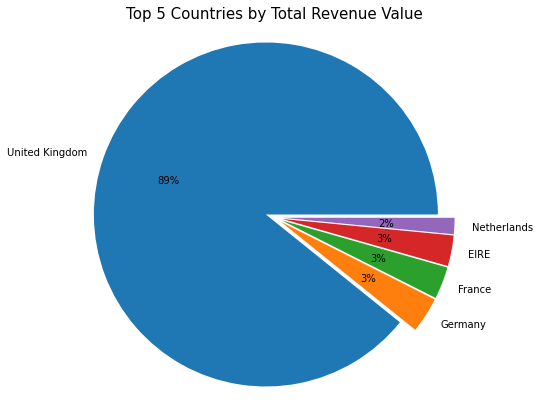

In [21]:
# Top countries by sales value
top_country = data.groupby('Country')['Total_Revenue'].sum().sort_values(ascending=False)[:10]
labels = top_country[:5].index
size = top_country[:5].values

plt.figure(figsize=(7,7))
plt.pie(size, labels=labels, explode=[0.05]*5, autopct='%1.0f%%')
plt.title("Top 5 Countries by Total Revenue Value", size=15)
plt.axis('equal')
plt.show()

In [22]:
# Printing the details of the dataset
maxdate = data['InvoiceDate'].dt.date.max()
mindate = data['InvoiceDate'].dt.date.min()
unique_cust = data['CustomerID'].nunique()
tot_quantity = data['Quantity'].sum()
tot_revenue = data['Total_Revenue'].sum()

print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Revenue for the period: {tot_revenue}")

The Time range of transactions is: 2010-12-01 to 2011-12-09
Total number of unique customers: 4339
Total Quantity Sold: 3309727.0
Total Revenue for the period: 5723253.914


In [23]:
corr_matrix=data.corr()
corr_matrix

,Quantity,UnitPrice,CustomerID,Total_Revenue
Quantity,1.000000,-0.386589,-0.122352,0.597326
UnitPrice,-0.386589,1.000000,-0.020056,0.286779
CustomerID,-0.122352,-0.020056,1.000000,-0.146159
Total_Revenue,0.597326,0.286779,-0.146159,1.000000


In [24]:
data_uk = data[data.Country =='United Kingdom']
data_uk.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue
0,536365,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
data_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 531269
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      354345 non-null  object        
 1   Quantity       354345 non-null  float64       
 2   InvoiceDate    354345 non-null  datetime64[ns]
 3   UnitPrice      354345 non-null  float64       
 4   CustomerID     354345 non-null  float64       
 5   Country        354345 non-null  object        
 6   Total_Revenue  354345 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 21.6+ MB


In [26]:
data_uk= data_uk.drop('Country',axis=1)

In [27]:
data_uk.CustomerID.nunique()

#There are total 3920 unique customers in the entire dataset

3921

In [28]:
# Printing the details of the dataset
maxdate = data_uk['InvoiceDate'].dt.date.max()
mindate = data_uk['InvoiceDate'].dt.date.min()
unique_cust = data_uk['CustomerID'].nunique()
tot_quantity = data_uk['Quantity'].sum()
tot_revenue = data_uk['Total_Revenue'].sum()

print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Revenue for the period: {tot_revenue}")

The Time range of transactions is: 2010-12-01 to 2011-12-09
Total number of unique customers: 3921
Total Quantity Sold: 2785830.0
Total Revenue for the period: 4789681.924000001


In [29]:
data_uk.describe()

,Quantity,UnitPrice,CustomerID,Total_Revenue
count,354345.000000,354345.000000,354345.000000,354345.000000
mean,7.861914,2.577164,15552.436219,13.517002
std,7.925652,2.083615,1594.546025,11.670663
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,14194.000000,4.160000
50%,4.000000,1.950000,15522.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,27.000000,7.500000,18287.000000,42.480000


In [30]:
# Transforming the data to customer level for the analysis
customer = data_uk.groupby('CustomerID').agg({'InvoiceDate':lambda x: (x.max() - x.min()).days, 
                                                   'InvoiceNo': lambda x: len(x),
                                                  'Total_Revenue': lambda x: sum(x)})

customer.columns = ['Age', 'Frequency', 'Total_Revenue']
customer.head()

,Age,Frequency,Total_Revenue
CustomerID,,,
12346.0,0,1,42.48
12747.0,366,103,2766.13
12748.0,372,4596,28013.98
12749.0,209,199,3946.74
12820.0,323,59,942.34


In [31]:
# Calculating the necessary variables for CLV calculation
Average_revenue = round(np.mean(customer['Total_Revenue']),2)
print(f"Average revenue: ${Average_revenue}")

Purchase_freq = round(np.mean(customer['Frequency']), 2)
print(f"Purchase Frequency: {Purchase_freq}")

Retention_rate = customer[customer['Frequency']>1].shape[0]/customer.shape[0]
churn = round(1 - Retention_rate, 2)
print(f"Churn: {churn}%")

Average revenue: $1221.55
Purchase Frequency: 90.37
Churn: 0.02%


In [32]:
# Calculating the CLV
Profit_margin = 0.05 

CLV = round(((Average_revenue * Purchase_freq/churn)) * Profit_margin, 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $275978.68


In [33]:
customer['Total_Revenue'].describe()

count     3921.000000
mean      1221.546015
std       2369.521701
min          0.000000
25%        244.800000
50%        559.460000
75%       1342.680000
max      49360.200000
Name: Total_Revenue, dtype: float64

In [34]:
# Transforming the data to customer level for the analysis
customer = data_uk.groupby('CustomerID').agg({'InvoiceDate':lambda x: x.min().month, 
                                                   'InvoiceNo': lambda x: len(x),
                                                  'Total_Revenue': lambda x: np.sum(x)})

customer.columns = ['Start_Month', 'Frequency', 'Total_Revenue']
customer.head()

,Start_Month,Frequency,Total_Revenue
CustomerID,,,
12346.0,1,1,42.48
12747.0,12,103,2766.13
12748.0,12,4596,28013.98
12749.0,5,199,3946.74
12820.0,1,59,942.34


In [35]:
# Calculating CLV for each cohort
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []

for i in range(1, 13):
    customer_m = customer[customer['Start_Month']==i]
    
    Average_revenue = round(np.mean(customer_m['Total_Revenue']),2)
    
    Purchase_freq = round(np.mean(customer_m['Frequency']), 2)
    
    Retention_rate = customer_m[customer_m['Frequency']>1].shape[0]/customer_m.shape[0]
    churn = round(1 - Retention_rate, 2)
    
    CLV = round(((Average_revenue * Purchase_freq/churn)) * Profit_margin, 2)
    
    Monthly_CLV.append(CLV)

In [36]:
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
display(monthly_clv.style.background_gradient())

,Months,CLV
0,Jan,433085.620000
1,Feb,254869.000000
2,March,414133.340000
3,Apr,294029.660000
4,May,67992.310000
5,Jun,181972.690000
6,Jul,40880.330000
7,Aug,97969.450000
8,Sep,150810.090000
9,Oct,57747.510000


In [37]:
# Importing the lifetimes package
import lifetimes

In [38]:
# Creating the summary data using summary_data_from_transaction_data function
summary = lifetimes.utils.summary_data_from_transaction_data(data_uk, 'CustomerID', 'InvoiceDate', 'Total_Revenue' )
summary = summary.reset_index()
summary.head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12747.0,10.0,367.0,369.0,256.489000
2,12748.0,113.0,373.0,373.0,247.867522
3,12749.0,3.0,210.0,213.0,1036.303333
4,12820.0,3.0,323.0,326.0,257.293333


count    3921.000000
mean        2.849783
std         5.717734
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       113.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 35.68 %


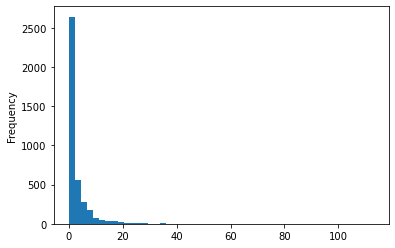

In [39]:
# Create a distribution of frequency to understand the customer frequence level
summary['frequency'].plot(kind='hist', bins=50)
print(summary['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(summary['frequency'] == 0)/float(len(summary))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [40]:
# Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 3921 subjects, a: 0.01, alpha: 69.62, b: 7.96, r: 0.83>

In [41]:
# Model summary
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.833309,0.028543,0.777365,0.889253
alpha,69.621310,2.787483,64.157844,75.084777
a,0.005501,0.013943,-0.021827,0.032829
b,7.960054,23.158462,-37.430531,53.350638


In [42]:
# Compute the customer alive probability
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,CustomerID,frequency,recency,T,monetary_value,probability_alive
0,12346.0,0.0,0.0,325.0,0.000000,1.000000
1,12747.0,10.0,367.0,369.0,256.489000,0.999659
2,12748.0,113.0,373.0,373.0,247.867522,0.999954
3,12749.0,3.0,210.0,213.0,1036.303333,0.999425
4,12820.0,3.0,323.0,326.0,257.293333,0.999432
5,12821.0,0.0,0.0,214.0,0.000000,1.000000
6,12822.0,1.0,17.0,87.0,198.460000,0.997957
7,12823.0,4.0,222.0,296.0,42.480000,0.998505
8,12824.0,0.0,0.0,59.0,0.000000,1.000000
9,12826.0,6.0,363.0,365.0,219.953333,0.999562


<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

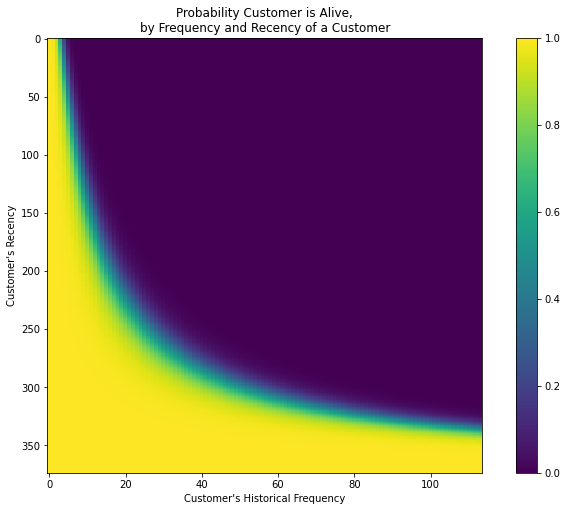

In [43]:
# Visual representation of relationship between recency and frequency
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [44]:
#Predict future transaction for the next 30 days based on historical dataa
t = 30
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,2,12748.0,113.0,373.0,373.0,247.867522,0.999954,7.71
1,3594,17841.0,111.0,372.0,373.0,341.118559,0.999940,7.58
2,1772,15311.0,89.0,373.0,373.0,342.247753,0.999943,6.09
3,1268,14606.0,88.0,372.0,373.0,130.975455,0.999929,6.02
4,110,12971.0,70.0,369.0,372.0,109.769143,0.999884,4.81
5,191,13089.0,65.0,367.0,369.0,666.369692,0.999897,4.50
6,1210,14527.0,53.0,367.0,369.0,153.330000,0.999883,3.68
7,694,13798.0,52.0,371.0,372.0,256.439423,0.999895,3.59
8,2581,16422.0,47.0,352.0,369.0,282.903191,0.999325,3.27
9,903,14096.0,16.0,97.0,101.0,3083.647500,0.999643,2.96


In [45]:
# Checking the relationship between frequency and monetary_value
return_customers_summary = summary[summary['frequency']>0]
print(return_customers_summary.shape)
return_customers_summary.head()

(2522, 7)


,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
1,12747.0,10.0,367.0,369.0,256.489000,0.999659,0.74
2,12748.0,113.0,373.0,373.0,247.867522,0.999954,7.71
3,12749.0,3.0,210.0,213.0,1036.303333,0.999425,0.41
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.29
6,12822.0,1.0,17.0,87.0,198.460000,0.997957,0.35


In [46]:
# Checking the relationship between frequency and monetary_value
return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.047737
monetary_value,0.047737,1.000000


In [47]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2522 subjects, p: 10.87, q: 0.94, v: 11.05>

In [48]:
# Calculating the conditional expected average profit for each customer per transaction
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_revenue'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                       summary['monetary_value'])
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_revenue
1,12747.0,10.0,367.0,369.0,256.489000,0.999659,0.74,257.747396
2,12748.0,113.0,373.0,373.0,247.867522,0.999954,7.71,247.978370
3,12749.0,3.0,210.0,213.0,1036.303333,0.999425,0.41,1042.053496
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.29,261.495420
6,12822.0,1.0,17.0,87.0,198.460000,0.997957,0.35,210.764416


In [49]:
# Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Revenue: {summary['exp_avg_revenue'].mean()}")
print(f"Actual Average Revenue: {summary['monetary_value'].mean()}")

Expected Average Revenue: 308.22979900840056
Actual Average Revenue: 301.74440394088396


In [50]:
# Predicting Customer Lifetime Value for the next 30 days
summary['predicted_clv'] =  ggf.customer_lifetime_value(bgf,
                                                               summary['frequency'],
                                                               summary['recency'],
                                                               summary['T'],
                                                               summary['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_revenue,predicted_clv
1,12747.0,10.0,367.0,369.0,256.489000,0.999659,0.74,257.747396,189.001210
2,12748.0,113.0,373.0,373.0,247.867522,0.999954,7.71,247.978370,1893.893509
3,12749.0,3.0,210.0,213.0,1036.303333,0.999425,0.41,1042.053496,419.521338
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.29,261.495420,75.209339
6,12822.0,1.0,17.0,87.0,198.460000,0.997957,0.35,210.764416,73.117837


In [51]:
summary['manual_predicted_clv'] = summary['pred_num_txn'] * summary['exp_avg_revenue']
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_revenue,predicted_clv,manual_predicted_clv
1,12747.0,10.0,367.0,369.0,256.489000,0.999659,0.74,257.747396,189.001210,190.733073
2,12748.0,113.0,373.0,373.0,247.867522,0.999954,7.71,247.978370,1893.893509,1911.913234
3,12749.0,3.0,210.0,213.0,1036.303333,0.999425,0.41,1042.053496,419.521338,427.241933
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.29,261.495420,75.209339,75.833672
6,12822.0,1.0,17.0,87.0,198.460000,0.997957,0.35,210.764416,73.117837,73.767546


In [52]:
# CLV in terms of profit (profit margin is 5%)
profit_margin = 0.05
summary['CLV'] = summary['predicted_clv'] * profit_margin
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_revenue,predicted_clv,manual_predicted_clv,CLV
1,12747.0,10.0,367.0,369.0,256.489000,0.999659,0.74,257.747396,189.001210,190.733073,9.450060
2,12748.0,113.0,373.0,373.0,247.867522,0.999954,7.71,247.978370,1893.893509,1911.913234,94.694675
3,12749.0,3.0,210.0,213.0,1036.303333,0.999425,0.41,1042.053496,419.521338,427.241933,20.976067
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.29,261.495420,75.209339,75.833672,3.760467
6,12822.0,1.0,17.0,87.0,198.460000,0.997957,0.35,210.764416,73.117837,73.767546,3.655892


In [53]:
# Distribution of CLV for the business in the next 30 days
summary['CLV'].describe()

count    2522.000000
mean        7.423385
std        12.928378
min         0.133611
25%         2.295794
50%         4.691825
75%         9.002234
max       451.777649
Name: CLV, dtype: float64

In [54]:
data_uk.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Revenue
0,536365,6.0,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8.0,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34


In [55]:
from datetime import timedelta

data_uk['Hour'] = data_uk['InvoiceDate'].dt.hour
data_uk['Weekday'] = data_uk['InvoiceDate'].dt.weekday
#data_uk['WeekdayName'] = data_uk['InvoiceDate'].dt.weekday_name
data_uk['Month'] = data_uk['InvoiceDate'].dt.month
data_uk.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Revenue,Hour,Weekday,Month
0,536365,6.0,2010-12-01 08:26:00,2.55,17850.0,15.30,8,2,12
1,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34,8,2,12
2,536365,8.0,2010-12-01 08:26:00,2.75,17850.0,22.00,8,2,12
3,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34,8,2,12
4,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34,8,2,12


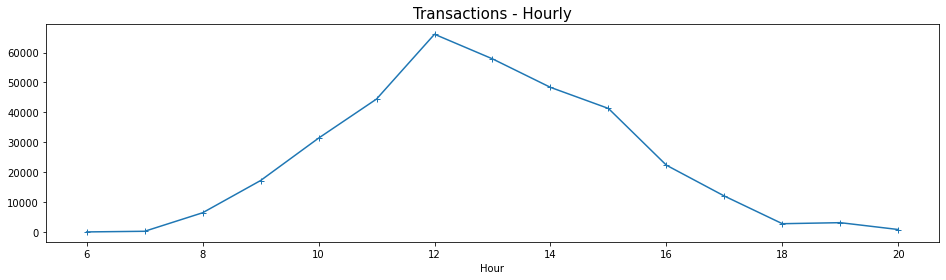

In [56]:
# Transaction trend in hour of the day
hour = data_uk.groupby('Hour')['Quantity'].count()
plt.figure(figsize=(16,4))
hour.plot(marker='+')
plt.title("Transactions - Hourly", size=15)
plt.show()

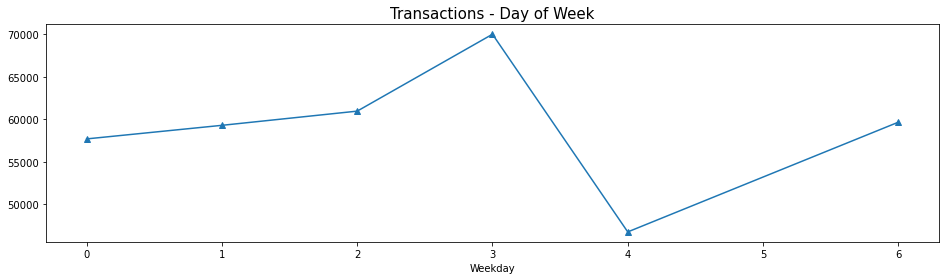

In [57]:
# Transaction trend in day of week
weekday = data_uk.groupby('Weekday')['Quantity'].count()
plt.figure(figsize=(16,4))
weekday.plot(marker='^')
plt.title("Transactions - Day of Week", size=15)
plt.show()

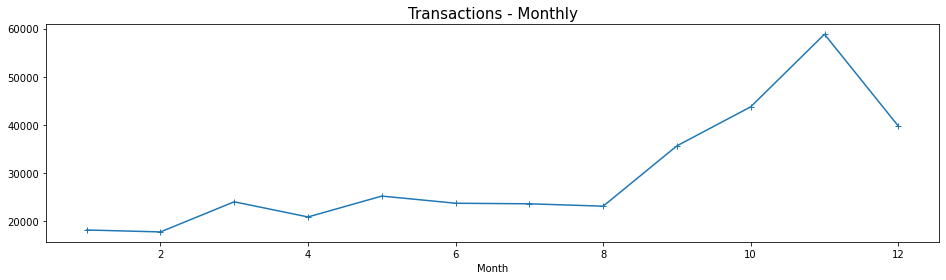

In [58]:
# Transaction trend across months
month = data_uk.groupby('Month')['Quantity'].count()
plt.figure(figsize=(16,4))
month.plot(marker='+')
plt.title("Transactions - Monthly", size=15)
plt.show()

In [59]:
def RFM_Features(df, customerID, invoiceDate, transID, revenue):
    ''' Create the Recency, Frequency, and Monetary features from the data '''
    # Final date in the data + 1 to create latest date
    latest_date = df[invoiceDate].max() + timedelta(1)
    
    # RFM feature creation
    RFMScores = df.groupby(customerID).agg({invoiceDate: lambda x: (latest_date - x.max()).days, 
                                          transID: lambda x: len(x), 
                                          revenue: lambda x: sum(x)})
    
    # Converting invoiceDate to int since this contains number of days
    RFMScores[invoiceDate] = RFMScores[invoiceDate].astype(int)
    
    # Renaming column names to Recency, Frequency and Monetary
    RFMScores.rename(columns={invoiceDate: 'Recency', 
                         transID: 'Frequency', 
                         revenue: 'Monetary'}, inplace=True)
    
    return RFMScores.reset_index()

In [60]:
RFM = RFM_Features(df=data_uk, customerID= "CustomerID", invoiceDate = "InvoiceDate", transID= "InvoiceNo", revenue="Total_Revenue")
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,42.48
1,12747.0,2,103,2766.13
2,12748.0,1,4596,28013.98
3,12749.0,4,199,3946.74
4,12820.0,3,59,942.34


,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,92.188472,90.371079,1221.546015
std,1576.823683,99.528995,217.796155,2369.521701
min,12346.000000,1.000000,1.000000,0.000000
25%,14208.000000,18.000000,17.000000,244.800000
50%,15569.000000,51.000000,41.000000,559.460000
75%,16913.000000,143.000000,99.000000,1342.680000
max,18287.000000,374.000000,7847.000000,49360.200000


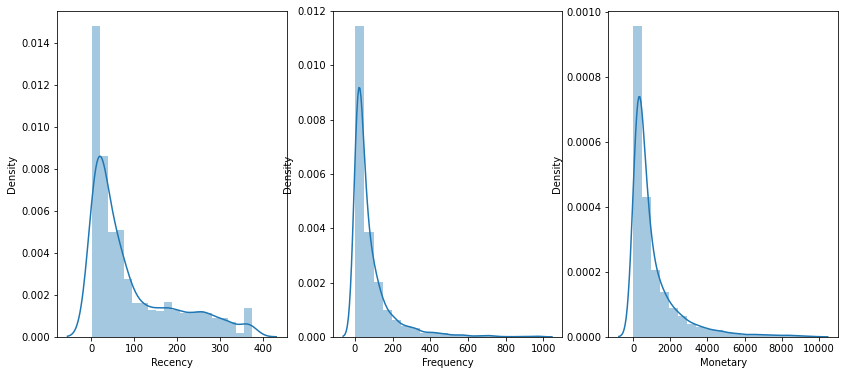

In [61]:
# Descriptive Stats
display(RFM.describe())

# Distributions of Recency, Frequency, and Monetary features
# Here we will filter out the extreme values in the Frequency and Monetary columns to avoid the skewness the distribution
fig, ax = plt.subplots(1,3, figsize=(14,6))

sns.distplot(RFM.Recency, bins=20, ax=ax[0])
sns.distplot(RFM[RFM['Frequency']<1000]['Frequency'], bins=20, ax=ax[1])
sns.distplot(RFM[RFM['Monetary']<10000]['Monetary'], bins=20, ax=ax[2])
plt.show()

In [62]:
# Creating quantiles 
Quantiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.50, 0.75])
Quantiles = Quantiles.to_dict()
Quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 244.79999999999995,
  0.5: 559.4599999999999,
  0.75: 1342.6800000000012}}

In [63]:
# Creating RFM ranks
def RFMRanking(x, variable, quantile_dict):
    ''' Ranking the Recency, Frequency, and Monetary features based on quantile values '''
    
    # checking if the feature to rank is Recency
    if variable == 'Recency':
        if x <= quantile_dict[variable][0.25]:
            return 4
        elif (x > quantile_dict[variable][0.25]) & (x <= quantile_dict[variable][0.5]):
            return 3
        elif (x > quantile_dict[variable][0.5]) & (x <= quantile_dict[variable][0.75]):
            return 2
        else:
            return 1
    
    # checking if the feature to rank is Frequency and Monetary
    if variable in ('Frequency','Monetary'):
        if x <= quantile_dict[variable][0.25]:
            return 1
        elif (x > quantile_dict[variable][0.25]) & (x <= quantile_dict[variable][0.5]):
            return 2
        elif (x > quantile_dict[variable][0.5]) & (x <= quantile_dict[variable][0.75]):
            return 3
        else:
            return 4

In [64]:
RFM['R'] = RFM['Recency'].apply(lambda x: RFMRanking(x, variable='Recency', quantile_dict=Quantiles))
RFM['F'] = RFM['Frequency'].apply(lambda x: RFMRanking(x, variable='Frequency', quantile_dict=Quantiles))
RFM['M'] = RFM['Monetary'].apply(lambda x: RFMRanking(x, variable='Monetary', quantile_dict=Quantiles))

In [65]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,1,42.48,1,1,1
1,12747.0,2,103,2766.13,4,4,4
2,12748.0,1,4596,28013.98,4,4,4
3,12749.0,4,199,3946.74,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [66]:
RFM['Group'] = RFM['R'].apply(str) + RFM['F'].apply(str) + RFM['M'].apply(str)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group
0,12346.0,326,1,42.48,1,1,1,111
1,12747.0,2,103,2766.13,4,4,4,444
2,12748.0,1,4596,28013.98,4,4,4,444
3,12749.0,4,199,3946.74,4,4,4,444
4,12820.0,3,59,942.34,4,3,3,433


In [67]:
# Check the number of score segments
RFM.Group.value_counts()

444    441
111    376
344    198
211    196
122    185
333    156
233    148
222    129
433    127
311    118
322    111
223    107
244    101
112     97
212     86
434     83
343     75
411     71
121     71
422     70
323     69
443     64
334     62
133     60
423     60
332     56
132     56
234     55
123     52
312     47
232     45
432     41
321     38
221     35
243     32
412     28
144     21
143     19
421     19
331     18
131     17
134     16
231     14
442     10
431      8
342      8
242      8
213      5
113      3
142      3
413      2
324      1
424      1
224      1
313      1
Name: Group, dtype: int64

In [68]:
RFM["Score"] = RFM[['R', 'F', 'M']].sum(axis=1)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score
0,12346.0,326,1,42.48,1,1,1,111,3
1,12747.0,2,103,2766.13,4,4,4,444,12
2,12748.0,1,4596,28013.98,4,4,4,444,12
3,12749.0,4,199,3946.74,4,4,4,444,12
4,12820.0,3,59,942.34,4,3,3,433,10


In [69]:
# Loyalty levels
loyalty = ['Bronze', 'Silver', 'Gold', 'Platinum']
RFM['Loyalty_Level'] = pd.qcut(RFM['Score'], q=4, labels= loyalty)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level
0,12346.0,326,1,42.48,1,1,1,111,3,Bronze
1,12747.0,2,103,2766.13,4,4,4,444,12,Platinum
2,12748.0,1,4596,28013.98,4,4,4,444,12,Platinum
3,12749.0,4,199,3946.74,4,4,4,444,12,Platinum
4,12820.0,3,59,942.34,4,3,3,433,10,Gold


In [70]:
behaviour = RFM.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary', 'Score']].mean()
behaviour

,Recency,Frequency,Monetary,Score
Loyalty_Level,,,,
Bronze,186.707770,13.591216,207.836023,4.057432
Silver,91.257463,33.516169,447.201332,6.487562
Gold,49.024412,81.239756,1080.816392,8.981691
Platinum,13.749364,277.511450,3746.002290,11.561069


In [71]:
import joblib

In [72]:
joblib.dump(bgf,"Models/bgf.joblib")

['Models/bgf.joblib']

In [73]:
joblib.dump(RFM,"Models/RFM.joblib")

['Models/RFM.joblib']